In [1]:
# Regression Models
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVR, LinearSVR
from matplotlib import pyplot as plt
from sklearn.pipeline import Pipeline
from lightgbm import LGBMRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.compose import ColumnTransformer
from sklearn.datasets import make_classification
from xgboost import XGBRegressor,XGBRFRegressor
from sklearn.neighbors import KNeighborsRegressor,KNeighborsTransformer
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.feature_selection import SelectKBest, f_regression, RFE, RFECV
from sklearn.preprocessing import LabelEncoder, StandardScaler ,OneHotEncoder, MinMaxScaler, PolynomialFeatures

from sklearn.model_selection import (train_test_split, KFold, cross_val_score, GridSearchCV, StratifiedKFold, learning_curve,
cross_val_predict, cross_validate,permutation_test_score,validation_curve,StratifiedKFold,RandomizedSearchCV)

from sklearn.metrics import (accuracy_score, cohen_kappa_score, confusion_matrix, mean_squared_error, r2_score, 
root_mean_squared_error, recall_score, roc_auc_score, roc_curve, mean_absolute_error, auc, mean_absolute_percentage_error)

from sklearn.ensemble import (AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor, RandomForestRegressor,
VotingRegressor, HistGradientBoostingRegressor, ExtraTreesRegressor, StackingRegressor)

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# loading data
train_df = pd.read_csv('house_train.csv')
test_df =  pd.read_csv('house_test.csv')

In [4]:
train_df.shape

(1460, 81)

In [5]:
test_df.shape

(1459, 80)

In [6]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
# missing values
train_df.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [ ]:
Id	             To count the records.
MSSubClass	  Identifies the type of dwelling involved in the sale.
MSZoning	  Identifies the general zoning classification of the sale.
LotArea	      Lot size in square feet.
LotConfig	  Configuration of the lot
BldgType	  Type of dwelling
OverallCond	  Rates the overall condition of the house
YearBuilt	  Original construction year
YearRemodAdd  Remodel date (same as construction date if no remodeling or additions).
Exterior1st	  Exterior covering on house
BsmtFinSF2	  Type 2 finished square feet.
TotalBsmtSF	  Total square feet of basement area
SalePrice	  To be predicted

In [9]:
subset_df = train_df[['Id','MSSubClass','MSZoning','LotArea','LotConfig','BldgType','OverallQual','OverallCond',
                     'YearBuilt','YearRemodAdd','Exterior1st','BsmtFinSF2','TotalBsmtSF','SalePrice']]

In [10]:
subset_df.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,1,60,RL,8450,Inside,1Fam,7,5,2003,2003,VinylSd,0,856,208500
1,2,20,RL,9600,FR2,1Fam,6,8,1976,1976,MetalSd,0,1262,181500
2,3,60,RL,11250,Inside,1Fam,7,5,2001,2002,VinylSd,0,920,223500
3,4,70,RL,9550,Corner,1Fam,7,5,1915,1970,Wd Sdng,0,756,140000
4,5,60,RL,14260,FR2,1Fam,8,5,2000,2000,VinylSd,0,1145,250000


In [11]:
obj = (subset_df.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (subset_df.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (subset_df.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 4
Integer variables: 10
Float variables: 0


<Axes: >

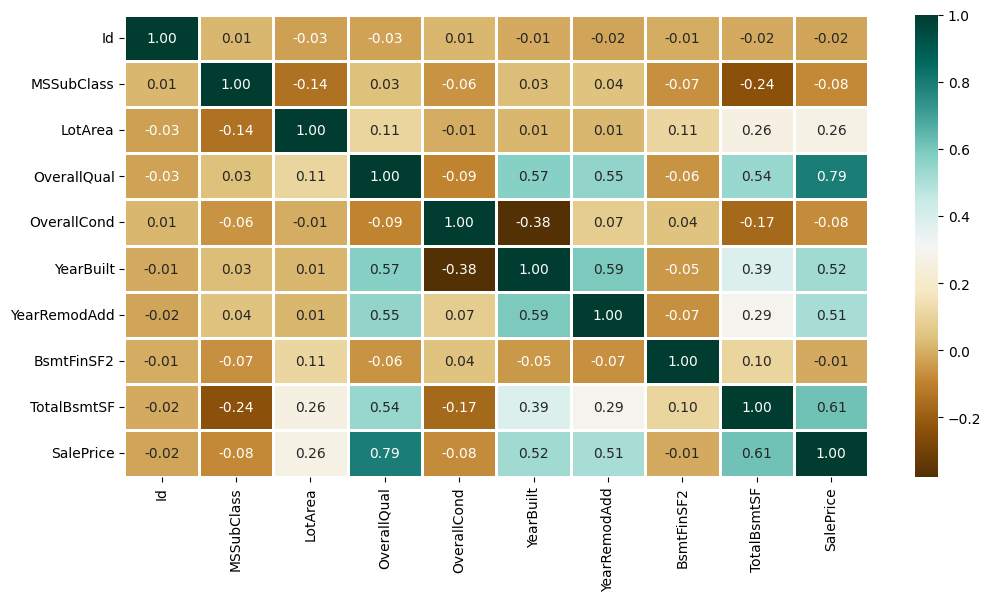

In [12]:
num = subset_df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 6))
sns.heatmap(num.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

<Axes: title={'center': 'Number of Unique Categorical Features'}>

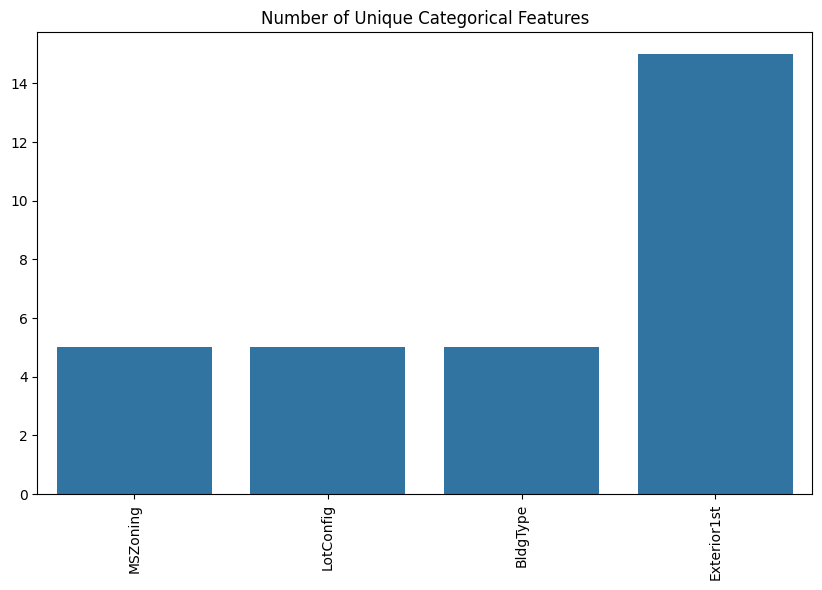

In [13]:
unique_values = []
for col in object_cols:
  unique_values.append(subset_df[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('Number of Unique Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

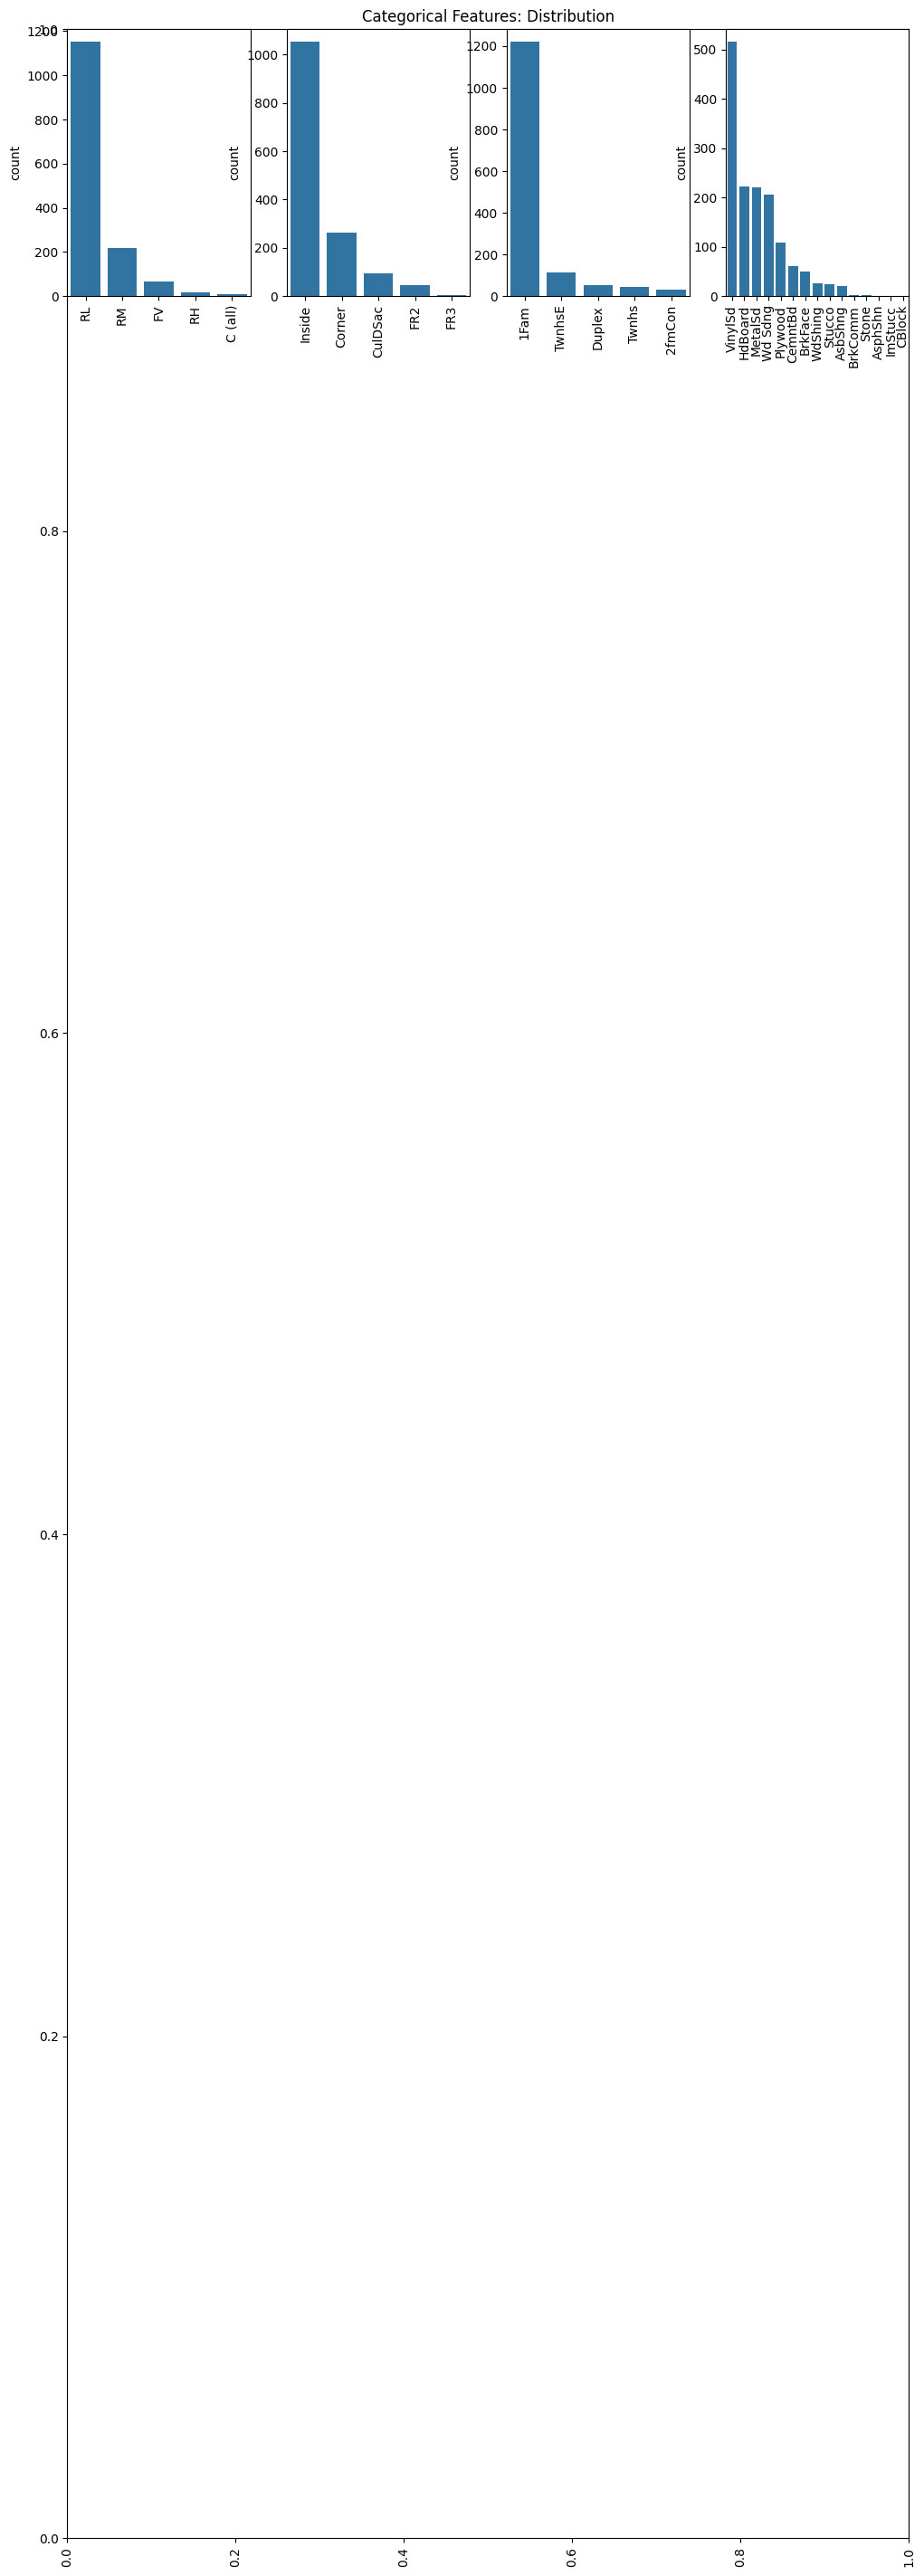

In [14]:
plt.figure(figsize=(12, 36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1

for col in object_cols:
    y = subset_df[col].value_counts()
    plt.subplot(8, 4, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index += 1

In [15]:
subset_df.isna().sum()

Id              0
MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [16]:
ob = (subset_df.dtypes == 'object')
object_cols = list(ob[ob].index)
print("Categorical variables:")
print(object_cols)
print('Nomber of categorical features: ', 
      len(object_cols))

Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
Nomber of categorical features:  4


In [17]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_cols = pd.DataFrame(encoder.fit_transform(subset_df[object_cols]))
encoded_cols.index = subset_df.index
encoded_cols.columns = encoder.get_feature_names_out()
df_final = subset_df.drop(object_cols, axis=1)
df_final = pd.concat([df_final, encoded_cols], axis=1)

In [18]:
df_final.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,1,60,8450,7,5,2003,2003,0,856,208500,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2,20,9600,6,8,1976,1976,0,1262,181500,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,60,11250,7,5,2001,2002,0,920,223500,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,70,9550,7,5,1915,1970,0,756,140000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5,60,14260,8,5,2000,2000,0,1145,250000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [19]:
X = df_final.drop(['SalePrice'], axis=1)
Y = df_final['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [20]:
# SVM
svr_model = SVR()
svr_model.fit(X_train, y_train)
svr_pred = svr_model.predict(X_test)

print(mean_absolute_percentage_error(svr_pred, y_test))

0.34325160359645346


In [25]:
svr_model.score(X_test, y_test)

-0.016239453223998446

In [21]:
# RandomForestRegressor
random_forest = RandomForestRegressor(n_estimators=10)
random_forest.fit(X_train, y_train)
rf_pred = random_forest.predict(X_test)

mean_absolute_percentage_error(rf_pred, y_test)

0.1230977771705529

In [26]:
random_forest.score(X_test, y_test)

0.8228332597145414

In [22]:
# LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

print(mean_absolute_percentage_error(lr_pred, y_test))

0.22434534808197565


In [27]:
lr_model.score(X_test, y_test)

0.7265044348724619

In [34]:
# BaggingRegressor
n_estimators_range = [10, 25, 50, 75, 100, 150, 200, 300]
train_scores = []
test_scores = []

for n_est in n_estimators_range:
    bagging = BaggingRegressor(
        estimator=DecisionTreeRegressor(max_depth=5, random_state=42),
        n_estimators=n_est,
        max_samples=0.8,
        max_features=0.8,
        random_state=42,
        n_jobs=-1
    )
    
bagging.fit(X_train, y_train)
bg_pred = bagging.predict(X_test)

print(mean_absolute_percentage_error(bg_pred, y_test))

0.1323481009057759


In [35]:
bagging.score(X_test, y_test)

0.8146303406679345

In [31]:
# GradientBoostingRegressor
gbr = GradientBoostingRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=4,
    min_samples_split=5,
    min_samples_leaf=2,
    subsample=0.8,
    max_features=0.5,
    random_state=42
)
gbr.fit(X_train, y_train)
gbr_pred = gbr.predict(X_test)

print(mean_absolute_percentage_error(gbr_pred, y_test))

0.11293944122480978


In [32]:
gbr.score(X_test, y_test)

0.8537134669025743

In [40]:
# AdaBoostRegressor 
adaboost = AdaBoostRegressor(random_state=42, learning_rate= 0.1,
                             loss= 'exponential', n_estimators= 200) 
adaboost.fit(X_train, y_train)
adaboost_pred = adaboost.predict(X_test)

print(mean_absolute_percentage_error(adaboost_pred, y_test))

0.15044940102085086


In [41]:
adaboost.score(X_test, y_test)

0.7652729062149456

In [36]:
# AdaBoostRegressor
# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'loss': ['linear', 'square', 'exponential']
}

# Grid search with cross-validation
ada_grid = AdaBoostRegressor(random_state=42)
grid_search = GridSearchCV(
    ada_grid, 
    param_grid, 
    cv=5, 
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best CV score: {-grid_search.best_score_:.4f}")

Best parameters: {'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 200}
Best CV score: 1702771123.4546


In [38]:
# Test performance
y_pred_grid = grid_search.predict(X_test)
print(f"Test MSE: {mean_squared_error(y_test, y_pred_grid):.4f}")
print(f"Test R²: {r2_score(y_test, y_pred_grid):.4f}\n")

Test MSE: 1674060341.8113
Test R²: 0.7653



#### Clearly GradientBoostingRegressor model is giving better accuracy as the mean absolute error is the least among all the other regressor models i.e. 0.12 

## Test_DF

In [47]:
subset_df_2 = test_df[['Id','MSSubClass','MSZoning','LotArea','LotConfig','BldgType','OverallQual','OverallCond',
                     'YearBuilt','YearRemodAdd','Exterior1st','BsmtFinSF2','TotalBsmtSF']]
subset_df_2.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF
0,1461,20,RH,11622,Inside,1Fam,5,6,1961,1961,VinylSd,144.0,882.0
1,1462,20,RL,14267,Corner,1Fam,6,6,1958,1958,Wd Sdng,0.0,1329.0
2,1463,60,RL,13830,Inside,1Fam,5,5,1997,1998,VinylSd,0.0,928.0
3,1464,60,RL,9978,Inside,1Fam,6,6,1998,1998,VinylSd,0.0,926.0
4,1465,120,RL,5005,Inside,TwnhsE,8,5,1992,1992,HdBoard,0.0,1280.0


In [49]:
X_test.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
258,259,60,12435,7,5,2001,2001,0,963,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
267,268,75,8400,5,8,1939,1997,0,720,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
288,289,20,9819,5,5,1967,1967,0,882,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
649,650,180,1936,4,6,1970,1970,499,630,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1233,1234,20,12160,5,5,1959,1959,0,1188,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [54]:
model_df = pd.DataFrame(X_test)
model_df['Price_predicted'] = np.round(gbr_pred, 2)
display(model_df.head())

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Price_predicted
258,259,60,12435,7,5,2001,2001,0,963,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,227856.35
267,268,75,8400,5,8,1939,1997,0,720,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,146832.70
288,289,20,9819,5,5,1967,1967,0,882,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,123795.42
649,650,180,1936,4,6,1970,1970,499,630,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78938.30
1233,1234,20,12160,5,5,1959,1959,0,1188,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,143175.06


In [55]:
model_df.to_csv('house_prediction_submission_2.csv', index=False)